<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12333 non-null  int64  
 1   name                            12328 non-null  object 
 2   host_id                         12333 non-null  int64  
 3   host_name                       12331 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12333 non-null  object 
 6   latitude                        12333 non-null  float64
 7   longitude                       12333 non-null  float64
 8   room_type                       12333 non-null  object 
 9   price                           12333 non-null  int64  
 10  minimum_nights                  12333 non-null  int64  
 11  number_of_reviews               12333 non-null  int64  
 12  last_review                     

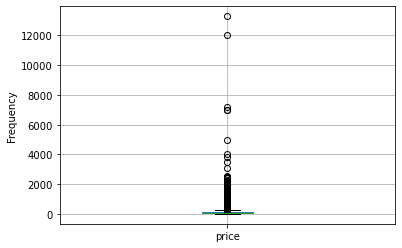

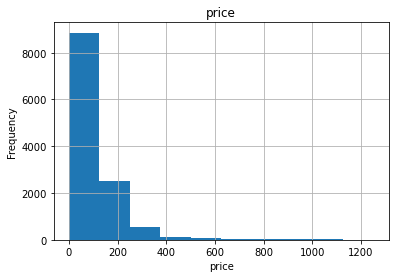

In [7]:
# Statistical Analysis
import pandas as pd
import matplotlib.pyplot as plt
# Read data
houses = pd.read_csv('listings.csv')
print(houses.info())
# Statistical Measures
print(houses.price.describe())
# Boxplot
houses.boxplot('price')
plt.ylabel('Frequency')
# Histogram
houses.hist(column=['price'], range=[0,1250])
plt.xlabel("price")
plt.ylabel('Frequency')
plt.show()

A statistical summary of the price for housing listings in Montreal is illustrated using three different methods. The first method displays a numeric summary of the count, mean, standard deviation, min, first/second/third percentile, and max price values. It is evident that housing prices range from 0-13,294 dollars with an the average price of 126 dollars. It is interesting that the average price is almost in the third quarter, indicating that the average price tends to be on the more expensive side of the price spectrum.

The second method illustrates a boxplot. Generally, a boxplot is used to compare different categories/columns to see how they effect the price individually, however, a boxplot also clearly shows the outliers. I decided to use a boxplot to explore the outliers and visualize how tightly grouped the data is. Without numeric values, the price data is tightly group with about 2500 listings with a similar price listing.

The third method used is a histogram to show the probability distribution of prices. It is evident that all listings range from 0-1200 dollars roughly. The majority of listings range from 0-370 dollars. In conclusion, the three methods provide a numerical and graphical statistical summary of the listing prices. Method 1 provides exact values of a statistical analysis whereas method 2 and 3 provide a visual of a statistical summary.

Next, a statistical test will be performed involving list room type and list price. The null hypothesis (H0) is that room type does not effect the price of a listing. We wish to determine if room type effects the listing price. The five questions for selecting a statistical method are used:

 1. How many variables do you have? Two variables.
 2. What is your statistical objective? Comparison.
 3. What scales of measurement do the variables use? Price/dollars.
 4. Are there dependent and independent variables? price: dependent variable, room type: independent variable
 5. Are the samples auto-correlated? No.

Firstly, there are two variables to compare: room type and list price. Second, there is one independent variable (room type). There are four different room types: entire home/apt, private room, hotel room, and shared room. Since there are four types of room types, it has a four level factor. As result, one-way parametric ANOVA will be used. The ANOVA test requires the parameters to be independent, population distribution to be normal, and samples to have equal variance. As mentioned above, room type is the independent variable, thus we need to prove normality and homogeneity of variance. The results are printed and interpreted below.

                    sum_sq       df          F        PR(>F)
C(room_type)  1.055006e+07      3.0  52.165479  1.699530e-33
Residual      8.311482e+08  12329.0        NaN           NaN
ShapiroResult(statistic=0.20892226696014404, pvalue=0.0)


C:\Users\Jade Watson\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


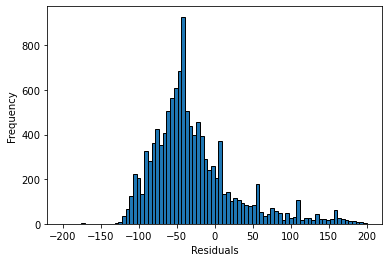

256.9460208151679 2.0578891378350037e-55


In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats

# Ordinary least squares (ols) model
model = ols('price ~ C(room_type)' , data =houses).fit()
# ANOVA output
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

# Normality Check
# Shapiro Check
print(stats.shapiro(model.resid))
# Visual Check
plt.hist(model.resid, bins='auto', histtype='bar', ec='k', range=[-200,200])
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Homegeneity of Variance
# Bartlett's test
w, pvalue = stats.bartlett(houses['price'][houses['room_type']== 'Entire home/apt'], houses['price'][houses['room_type'] == 'Private room'], houses['price'][houses['room_type'] == 'Hotel room'],houses['price'][houses['room_type']=='Shared room'])
print(w, pvalue)

Upon completion of the ANOVA test, we obtain a statistic of 52.2 and p value of 1.7e-33. Since p < 0.05, we conclude that there is a statistically significant difference between the room type and their effects on price. For this reason, the null hypothesis is rejected and indeed room type does have an effect on price of the listing (H1).

The histogram illustrates a normal distributions and suggests that the residuals are approximately normally distributed. To check, I used the Shapiro-Wilk test. However, N>5000 results in an inaccurate p-value, and thus, I cannot conclude if the data is normally distributed from this test. As the data is drawn from normal distribution, I used Bartlett's test to check homogeneity of variances. The null hypothesis for the Barlett's test is samples from populations have equal variances. Since p<0.05, the null hypothesis is rejected and therefore it is possible that the population does not have equal variances. In this is the case, one way ANOVA may not be the best statistical test to use, however, still suffices as it meets most of the parameter requirements compared to other tests.

A statistical test will now be performed between listing neighbourhood and list price. The null hypothesis (H0) is the neighbourhood does not effect the listing price. We wish to determine if the neighbourhood effects the listing price. Similar to the above, I will use the five questions to determine which statistical test to use.

 1. How many variables do you have? Two variables.
 2. What is your statistical objective? Comparison.
 3. What scales of measurement do the variables use? Price.
 4. Are there dependent and independent variables? price: dependent variable, neighbourhood: independent variable
 5. Are the samples auto-correlated? No.

Similarly, there are two variables to compare: neighbourhood and list price. Second, there is one independent variable (neighbourhood). There are multiple (more than two categories) different neighbourhoods. As result, one-way parametric ANOVA will be used. As mentioned above, neighbourhood is the independent variable, thus we need to prove normality and homogeneity of variance. The results are printed and interpreted below.

                        sum_sq       df         F   PR(>F)
C(neighbourhood)  4.978999e+06     31.0  2.361245  0.00003
Residual          8.367193e+08  12301.0       NaN      NaN
ShapiroResult(statistic=0.2242862582206726, pvalue=0.0)


C:\Users\Jade Watson\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


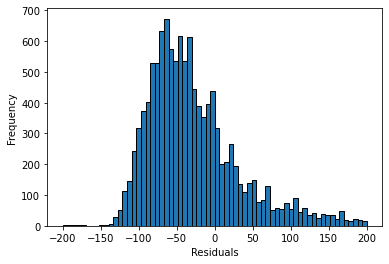

Text(0, 0.5, 'residuals')

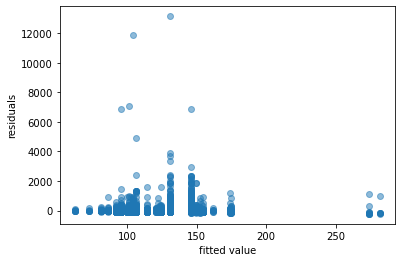

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats
from bioinfokit.analys import stat

model2 = ols('price ~ C(neighbourhood)', data =houses).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
print(aov_table2)

# Normality Check
# Numerical Check
print(stats.shapiro(model2.resid))
# Visual Check
plt.hist(model2.resid, bins='auto', histtype='bar', ec='k', range=[-200,200])
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Homegeneity of Variance
#stat.bartlett(df = houses, xfac_var = 'neighbourhood', res_var = 'price')
# visual check
x = model2.fittedvalues
y = model2.resid
plt.scatter(x,y, alpha = 0.5)
plt.xlabel('fitted value')
plt.ylabel('residuals')

Upon completion of the ANOVA test, we obtain a statistic of 2.3612 and p value of 0.00003. Since p < 0.05, we conclude that there is a statistically significant difference between the neighbourhood and their effects on price. For this reason, the null hypothesis is rejected and indeed neighbourhood does have an effect on price of the listing (H1).

The histogram illustrates a normal distributions and suggests that the residuals are approximately normally distributed. To check, I used the Shapiro-Wilk test. However, N>5000 results in an inaccurate p-value, and thus, I cannot conclude if the data is normally distributed from this test. As the data is drawn from normal distribution, I tried to use Bartlett's test to check homogeneity of variances, however, I couldn't figure out how to define the variable self. Instead I checked the assumption using a scatter plot. The null hypothesis for the Barlett's test is samples from populations have equal variances. We wish to see the points distributed around 0, forming a constant line of best fit. It is evident that the majority points are plotted around 0 and thus have equal variances. As a result, the parameter assumptions are verified and one-way ANOVA test is the ideal statistical test.

A correlation analysis is performed between listing availability and reviews per month. It would be interesting to analyze the correlation between these two attributes because it will demonstrate if peer review influences how often a host keeps a listing available. For example, if a listing has lots of reviews per month, it may peek other consumer's interest in the listing and therefore the host may increase availability.

In [16]:
# Pearson Correlation between availability and reviews per month
import pandas as pd
houses = pd.read_csv('listings.csv')
houses['availability_365'].corr(houses['reviews_per_month'])

0.13367802740832957

The correlation between availability and reviews per month is 0.133. The strongest correlation is 1.0 which occurs when the same attributes are selected. In conclusion, 0.133 indicates a weak positive correlation between the two. This means that the two attributes do influence one another, however, have a very minimal influence. Therefore, availability of a listing does not increase if the number of reviews per month increases.

A correlation is performed between the number of reviews and the number of host listings. It would be interesting to analyze the correlation between these two attributes because it will demonstrate if a popular host with lots of listings obtains more comments than a host with less listings. This could indicate that a consumer is more likely to rent a place from a more popular host.

In [19]:
# Pearson Correlation between number of reviews and number of host listings
import pandas as pd
houses = pd.read_csv('listings.csv')
#houses.corr(method='pearson')
houses['number_of_reviews'].corr(houses['calculated_host_listings_count'])

-0.03473666553445677

The correlation between number of reviews and calculated host listings is -0.035. This indicates a weak negative correlation and thus the two attributes do not influence one another. To be more clear, a host with less listings may achieve the same or more number of reviews as a host with more listings.